### Generics

In [1550]:
import string
import numpy as np

In [1551]:
phrase = "To be, or not to be, that is the question"


In [1552]:
phrase_list = [i for i in phrase]

In [1553]:
def generate_random_solution(size , bin_str_size = 7):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(bin_str_size))
        phrase = phrase + binary_letter_string
    return phrase

In [1554]:
individual = generate_random_solution(len(phrase))
individual

'00101101100100110100100110011101000010001011010111000101110100100100100000010100110010110000101010001101001101000100011110010010100001011111011011111101011111110110100011001010100001111010111110000000110010000100000100000110110100001000010001110100101011001011010000110111111010010010101'

In [1555]:
int("1111111", 2)

127

In [1556]:
all_letters = string.printable[0:95]
#all_letters = string.printable[10:36]
print(all_letters)
print(len(all_letters))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
95


In [1557]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
#def scale(value, new_min = 0, new_max = 25, old_max = 31):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [1558]:
def inverse_scale(scaled_value, new_min=0, new_max=94, old_max=127, old_min=0):
#def inverse_scale(scaled_value, new_min=0, new_max=25, old_max=31, old_min=0):
    return np.round(((scaled_value - new_min) / (new_max - new_min)) * (old_max - old_min) + old_min)

In [1559]:
def decode_binary_to_phrase(individual, bin_str_size = 7):
    phrase = ""
    for pos in range(0, len(individual), bin_str_size):
        binary_letter = str(individual[pos: pos+bin_str_size])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [1560]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'g-;j:p<P;d1U$vjCq-X)F^~:.o^`4o14:oaT.X?;g'

In [1561]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.0001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [1562]:
score = individual_score(phrase, individual_phrase)
score

0.9999

In [1563]:
text_list = []
for i in range(100):
    individual = generate_random_solution(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

00001010101101001110111101110000101001111000010101110000101011110111010010111001001111100011100100101010001001001000010100110010001100001111111000011010101001110110001101000000000000001010010000101101000011001111010010101010010100001010000011100100000010111000000001100110110110100100001
4xl_4m7@#(he[-!rNUQb@;W,o0fN:C;vuulL'1V&o
0.9999
____________________________________________________________________________________________________

00111000100111000001001001001000111100001110101000001000100011100110000110100110000000111110100011001111011101110111001001101001100001011010111111011011011011100101001001101000010101011010011011011100101011010010110010111101111101001010111110011101011000111010010011110000111010110010010
lt1rRO!6RiC*nqm_GjA&~>'ZCgC>.C%J{w\#le+<d
0.9999
____________________________________________________________________________________________________

11010111100101111111010100100000011110001010011110010111110000101010011010111010001000100011001111111010001111000000001111

In [1564]:
text_list

["4xl_4m7@#(he[-!rNUQb@;W,o0fN:C;vuulL'1V&o",
 "lt1rRO!6RiC*nqm_GjA&~>'ZCgC>.C%J{w\\#le+<d",
 '<.~Z2,Wh+u#pdW]I1^a@Ax7jF&$usG{l<[]H)OMV?',
 '2#4Zl=_IH^7,8hy<dU:CGVoQe%D%3?O3zxKx`^0J&',
 '|mn*8xlRh)r4 wEUq"+Lj.@kIq(:OX>NYj*nRWW7(',
 'C$h\\*F\\dWCr8&XO$J~Z^}^l&"N4)8Un{44cG.gju(',
 'E[w.@h4*%)F`A<j[6[jCW>.,8&hQ^GKGc`IX`A2kI',
 '">!w)(~y*gVx!8I}{VSR.vg8Z\'F{;~_1dXGPCYgV1',
 'q x{IWPAVJ,{hd[PRg{Fl\'A"rYK^0VdI\\K@{9x&2S',
 '9M@`rI[}^#!o%K;>#b.R&ju#i=rq(oe5Gr,(-7`od',
 'U^oQsMsAoY+{3k1~UUeZ=A37w$wF,1,Q[Q;^t.UJ2',
 'fDnA^)SL+UCH_=odF-CP;`4,W6I j]&]x,og7F>;I',
 'xz{\\kjA=KUarU&&NCB6UI"u)wOMe.lj#udiM&u#P*',
 'hT57:>rz"jv_h]"(d(A1cC[tO"?0A;![<r?}NYp\'U',
 'F\'=8"vWPuRyUJ]>Z@]7Q[RJz\\j3?{&<L|G!I\\&T?,',
 '#Uj 1so=[dji\\xx$rJ,b4X?ixt7)CH.gVRRWUO^4a',
 't-LUa V/i2_i|jWud*2Q9LcgrrB,MuDKa1#u8m_K8',
 ':9O7/qP;BL3"pUN;IN++OR]*^<{gY21992Nr4mExq',
 'hO.OxsiI#G:vN#`^}RpK|%Bd{B~{aBjRH yv5K>..',
 '=Q1{LIz*MF,+L/~@j4OT4/}~,U|L}2f>Y IeC<C7W',
 'zrnLSu^eb[B4r\'&>OeICiWDnZ90uFfKk"]Q`Gw)T`',
 '/9WF0~1YIO#az:QPwXE

In [1565]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [1566]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True);

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text);
        image_file = os.path.join(image_folder, f"image_{i}.png");
        image.save(image_file);
        image_files.append(image_file);



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1);  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file);

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path));

C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

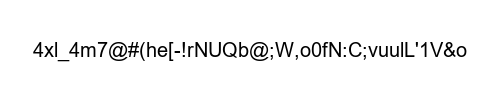

In [1567]:
generate_GIF(text_list);

### Simulated Annealing

In [1568]:
#def simulated_annealing()

#

In [1569]:
#Select a initial Solution
initial_solution = generate_random_solution(len(phrase))

In [1570]:
len(initial_solution)

287

In [1571]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [1572]:
initial_solution == perturbate_solution(initial_solution, 1)

False

In [1573]:
#Select the temperature change counter
k = 0.95

#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

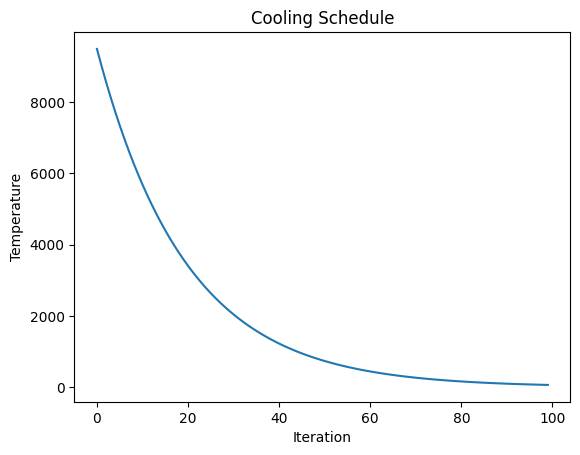

In [1574]:
import matplotlib.pyplot as plt

temperature = 10000
k = 0.95
t_list = []
for i in range(100):
    temperature = cooling_schedule(temperature, k)
    t_list.append(temperature)
    
plt.plot(t_list);
plt.title("Cooling Schedule");
plt.xlabel("Iteration");
plt.ylabel("Temperature");

In [1575]:
#Select a repetition schedule
#number of iterations executed at each temperature
def repetition_schedule(T):
    #TODO
    return 5

In [1576]:

def encode_phrase_to_bin(phrase, bin_str_size = 7):

    str_list = [i for i in phrase]

    final_string = ''
    for idx in range(len(str_list)):
        letter = str_list[idx]
        integer_representation = all_letters.index(letter)
        binary_string = bin(int(inverse_scale(integer_representation)))[2:].zfill(bin_str_size) 
        final_string += binary_string
    return final_string

In [1577]:
encode_phrase_to_bin('hello')

'00101110010011001110000111000100000'

In [1578]:
decode_binary_to_phrase('00101110010011001110000111000100000')

'hello'

In [1579]:
#Select a initial Solution
s0 = generate_random_solution(len(phrase))
observation = 0

min_temperature = 0.000001
max_temperature = 100
score_list = []
bin_list = []
#Select the temperature change counter
k = 0.998
bin_phrase = encode_phrase_to_bin(phrase)
#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)
    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        
        s1_score = individual_score(bin_phrase, s1)
        s0_score = individual_score(bin_phrase, s0)
        
        delta = s1_score - s0_score
        
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            p = np.exp(-delta/T)
            if np.random.random() > p:
                s0 = s1
                
        observation += 1
        score_list.append(s0_score)
        
    if observation % 10 == 0:
        bin_list.append(s0)
        
    if observation % 1000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
    T = cooling_schedule(T, k)
    
    if s0_score == 0:
        
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
        break

Observation: 1000 | Temperature 67.13944025429075 | score: 0.010452961672473893 | p: 0.9999481045696337
To?be, or not to be, thar is the questioh
10010100100000110111100011110010011110001111111110100000010010011111110011111010000001001111111111010011101000001111111000111100100111100011111111101001110010111000111001001011111111001100001001101111111010011100101110010011111111101000110101001001001101001100100111001100001000000010111
Observation: 1695 | Temperature 50.728672365146146 | score: 0.0 | p: 0.9999314542925308
To be, or not to be, that is the question
10010100100000111111100011110010011110001111111110100000010010011111110011111010000001001111111111010011101000001111111000111100100111100011111111101001110010111000111001001111111111001100001001101111111010011100101110010011111111101000110101001001001101001100100111001100001000000011111


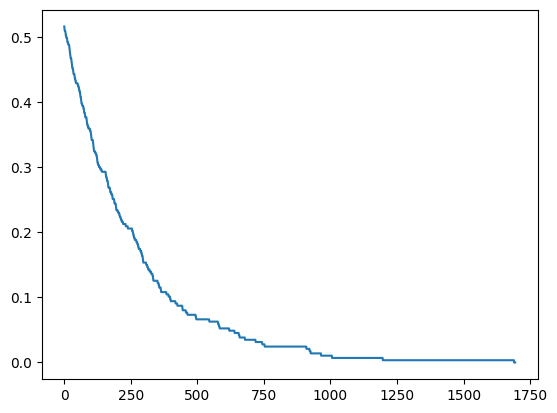

In [1580]:
plt.plot(score_list);

C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_4900\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

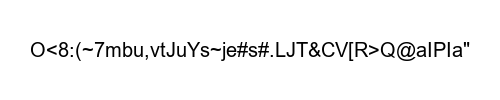

In [1581]:
text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list]
generate_GIF(text_list);